# Stratified GridSearchCV

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

Rozważmy zbiór Breast Cancer

In [2]:
np.random.seed(1)
cancer = datasets.load_breast_cancer()
# print description
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [3]:
# get the data
X = cancer.data
y = cancer.target

Podzielmy zbiór na część testową i treningową .

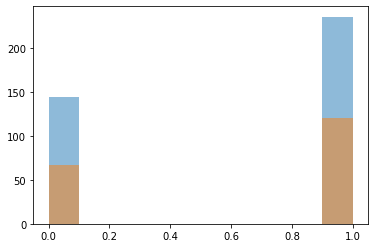

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

plt.hist(y_train, alpha=0.5)
plt.hist(y_test, alpha=0.5)
plt.show()

# Zadanie
Znajdż najleprzy model dzieląc na zbiór testowy i terningowy dla 

* SVM z jądrem rbf
* SVM z jądrem poly
* SVM liniowego
* Regresji logistycznej


In [5]:
from sklearn.model_selection import StratifiedKFold

seed=123
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_1 = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=kfold, return_train_score=True, n_jobs=4)

grid_1.fit(X_train, y_train)
grid_1.best_params_

{'C': 1, 'gamma': 0.001}

In [7]:
def heatmap(values, xlabel, ylabel, xticklabels, yticklabels, cmap=None,
            vmin=None, vmax=None, ax=None, fmt="%0.2f"):
    if ax is None:
        ax = plt.gca()
    # plot the mean cross-validation scores
    img = ax.pcolor(values, cmap=cmap, vmin=vmin, vmax=vmax)
    img.update_scalarmappable()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xticks(np.arange(len(xticklabels)) + .5)
    ax.set_yticks(np.arange(len(yticklabels)) + .5)
    ax.set_xticklabels(xticklabels)
    ax.set_yticklabels(yticklabels)
    ax.set_aspect(1)

    for p, color, value in zip(img.get_paths(), img.get_facecolors(),
                               img.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.mean(color[:3]) > 0.5:
            c = 'k'
        else:
            c = 'w'
        ax.text(x, y, fmt % value, color=c, ha="center", va="center")
    return img

In [8]:
import pandas as pd
# convert to DataFrame
results = pd.DataFrame(grid_1.cv_results_)
# show the first 5 rows
# display(results.head())

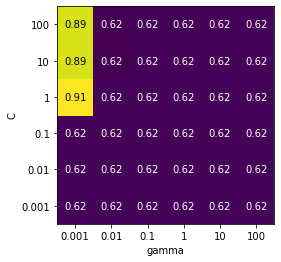

In [9]:
scores = np.array(results.mean_test_score).reshape(6, 6)
# plot the mean cross-validation scores
heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'], ylabel='C', yticklabels=param_grid['C'], cmap="viridis")
plt.show()

# Zad

Popraw greed i narysuj rysunek

* 0.0001

In [10]:
param_grid = {'C': [1, 1e1, 1e2, 1e3, 1e4, 1e5],
              'gamma': [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3]}

grid_1 = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=kfold, return_train_score=True, n_jobs=4)

grid_1.fit(X_train, y_train)
grid_1.best_params_

{'C': 100000.0, 'gamma': 1e-07}

In [11]:
results = pd.DataFrame(grid_1.cv_results_)

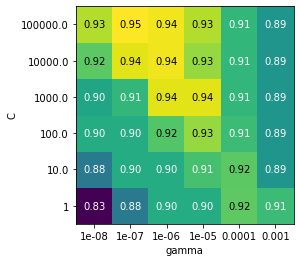

In [12]:
scores = np.array(results.mean_test_score).reshape(6, 6)
# plot the mean cross-validation scores
heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'], ylabel='C', yticklabels=param_grid['C'], cmap="viridis")
plt.show()

In [13]:
from sklearn import  metrics

def get_scores(name, model):
    precision_score = metrics.precision_score(y_test, model.predict(X_test))
    recall_score = metrics.recall_score(y_test, model.predict(X_test))
    f1_score = metrics.f1_score(y_test, model.predict(X_test))
    accuracy_score = metrics.accuracy_score(y_test, model.predict(X_test))

    return dict(method=name, precision=precision_score, recall=recall_score, f1=f1_score, accuracy=accuracy_score)

def print_scores(scores):
    print(scores['method'])
    print("R^2: {}".format(scores['precision']))
    print("recall_score: {}".format(scores['recall']))
    print("f1_score: {}".format(scores['f1']))
    print("accuracy_score: {}".format(scores['accuracy']))

In [14]:
models = []
models.append(('SVM rbf', grid_1.best_estimator_))
scores_1 = get_scores(*models[-1])
print_scores(scores_1)
# SVM rbf
# R^2: 0.9818181818181818
# recall_score: 0.8925619834710744
# f1_score: 0.935064935064935
# accuracy_score: 0.9202127659574468

SVM rbf
R^2: 0.9754098360655737
recall_score: 0.9834710743801653
f1_score: 0.9794238683127573
accuracy_score: 0.973404255319149


In [15]:
import pandas as pd
summary = pd.DataFrame(data=scores_1, index=[0])
summary

,method,precision,recall,f1,accuracy
0,SVM rbf,0.97541,0.983471,0.979424,0.973404


{'C': 1000.0, 'degree': 1}


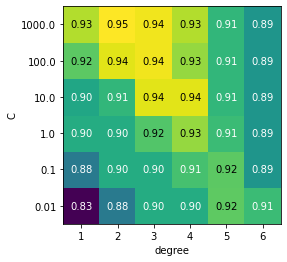

SVM poly
R^2: 0.9834710743801653
recall_score: 0.9834710743801653
f1_score: 0.9834710743801653
accuracy_score: 0.9787234042553191


,method,precision,recall,f1,accuracy
0,SVM rbf,0.975410,0.983471,0.979424,0.973404
1,SVM poly,0.983471,0.983471,0.983471,0.978723


In [16]:
# SVM POLY KERNEL

# GRID
param_grid = {'C': [1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3],
              'degree': [1, 2, 3, 4, 5, 6]}

grid_2 = GridSearchCV(SVC(kernel='poly'), param_grid, cv=kfold, return_train_score=True, n_jobs=4)

grid_2.fit(X_train, y_train)
print(grid_2.best_params_)

# HEATMAP

results = pd.DataFrame(grid_1.cv_results_)
scores = np.array(results.mean_test_score).reshape(6, 6)
# plot the mean cross-validation scores
heatmap(scores, xlabel='degree', xticklabels=param_grid['degree'], ylabel='C', yticklabels=param_grid['C'], cmap="viridis")
plt.show()

# PRINT SCORES

models.append(('SVM poly', grid_2.best_estimator_))
scores_2 = get_scores(*models[-1])
print_scores(scores_2)

# INSERT SCORES

summary.loc[1] = scores_2
summary

{'C': 1.0}


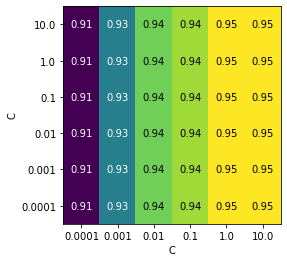

SVM linear
R^2: 0.9669421487603306
recall_score: 0.9669421487603306
f1_score: 0.9669421487603306
accuracy_score: 0.9574468085106383


,method,precision,recall,f1,accuracy
0,SVM rbf,0.975410,0.983471,0.979424,0.973404
1,SVM poly,0.983471,0.983471,0.983471,0.978723
2,SVM linear,0.966942,0.966942,0.966942,0.957447


In [17]:
# SVM LINEAR KERNEL

# GRID
param_grid = {'C': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1]}

grid_3 = GridSearchCV(SVC(kernel='linear'), param_grid, cv=kfold, return_train_score=True, n_jobs=4)

grid_3.fit(X_train, y_train)
print(grid_3.best_params_)

# HEATMAP

results = pd.DataFrame(grid_3.cv_results_)
scores = np.array([results.mean_test_score] * 6).reshape(6,6)
# plot the mean cross-validation scores
heatmap(scores, xlabel='C', xticklabels=param_grid['C'], ylabel='C', yticklabels=param_grid['C'], cmap="viridis")
plt.show()

# PRINT SCORES

models.append(('SVM linear', grid_3.best_estimator_))
scores_3 = get_scores(*models[-1])
print_scores(scores_3)

# INSERT SCORES

summary.loc[2] = scores_3
summary

{'C': 10.0, 'solver': 'liblinear'}


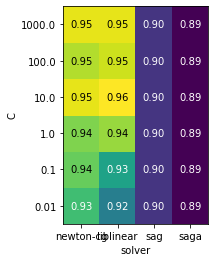

Logistic Regression
R^2: 0.9747899159663865
recall_score: 0.9586776859504132
f1_score: 0.9666666666666667
accuracy_score: 0.9574468085106383


,method,precision,recall,f1,accuracy
0,SVM rbf,0.975410,0.983471,0.979424,0.973404
1,SVM poly,0.983471,0.983471,0.983471,0.978723
2,SVM linear,0.966942,0.966942,0.966942,0.957447
3,Logistic Regression,0.974790,0.958678,0.966667,0.957447


In [18]:
# LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression

# GRID
param_grid = {'C': [1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3],
             'solver': ['newton-cg', 'liblinear', 'sag', 'saga']}

grid_4 = GridSearchCV(LogisticRegression(), param_grid, cv=kfold, return_train_score=True, n_jobs=4)

grid_4.fit(X_train, y_train)
print(grid_4.best_params_)

# HEATMAP

results = pd.DataFrame(grid_4.cv_results_)
scores = np.array(results.mean_test_score).reshape(6,4)
# plot the mean cross-validation scores
heatmap(scores, xlabel='solver', xticklabels=param_grid['solver'], ylabel='C', yticklabels=param_grid['C'], cmap="viridis")
plt.show()

# PRINT SCORES

models.append(('Logistic Regression', grid_4.best_estimator_))
scores_4 = get_scores(*models[-1])
print_scores(scores_4)

# INSERT SCORES

summary.loc[3] = scores_4
summary